# [카카오 인턴] 키패드 누르기
> https://programmers.co.kr/learn/courses/30/lessons/67256#

# 문제 설명
> 스마트폰 전화 키패드의 각 칸에 다음과 같이 숫자들이 적혀 있습니다. 

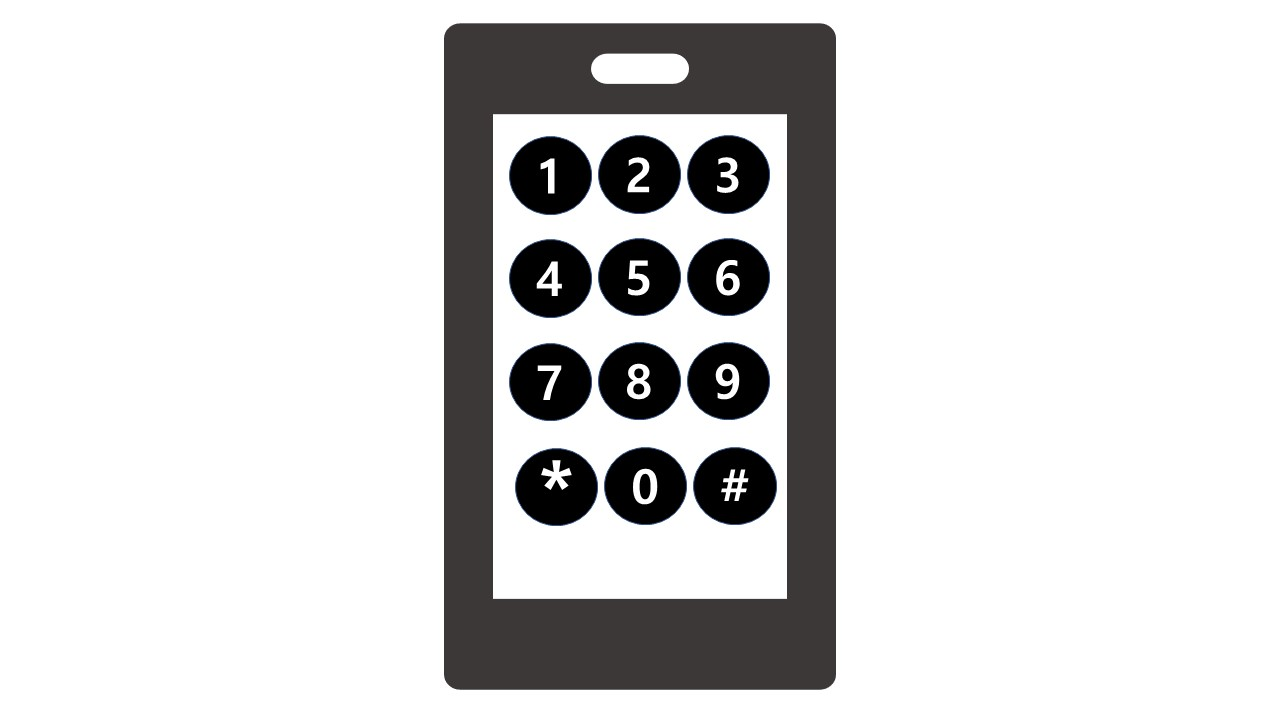

>이 전화 키패드에서 왼손과 오른손의 엄지손가락만을 이용해서 숫자만을 이별갛려고 합니다.
맨처음 왼손 엄지손가락은 '*'  오른손 엄지손가락은 '#' 키패드 위치에서 시작하며, 규칙은 다음과 같습니다.
1. 엄지손가락은 상하좌우 4가지 방향으로만 이동할 수 있으며 키패드 이동 한 칸은 거리로 1에 해당합니다.
2. 왼쪽 열의 3개의 숫자 1, 4, 7을 입력할 때는 왼손 엄지손가락을 사용합니다.
3. 오른쪽 열의 3개의 숫자 3, 6, 9를 입력할 때는 오른손 엄지손가락을 사용합니다.
4. 가운데 열의 4개의 숫자 2, 5, 8, 0을 입력할 때는 두 엄지손가락의 현재 키패드의 위치에서 더 가까운 엄지손가락을 사용합니다.
    - 만약 두 엄지손가락의 거리가 같다면, 오른손잡이는 오른손 엄지손가락, 왼손잡이는 왼손 엄지손가락을 사용합니다.
    
# 제한사항
- numbers 배열의 크기는 1이상 1,000 이하힙니다.
- numbers 배열 원소의 값은 0이상 9이하인 정수입니다.
- hand는 "left" 또는 "right" 입니다.
- 왼손 엄지손가락을 사용한 경우는 'L', 오른손 엄지손가락을 사용한 경우는 'R'을 순서대로 이어붙여 문자열 형태로 return 해주세요.

# 입출력 예



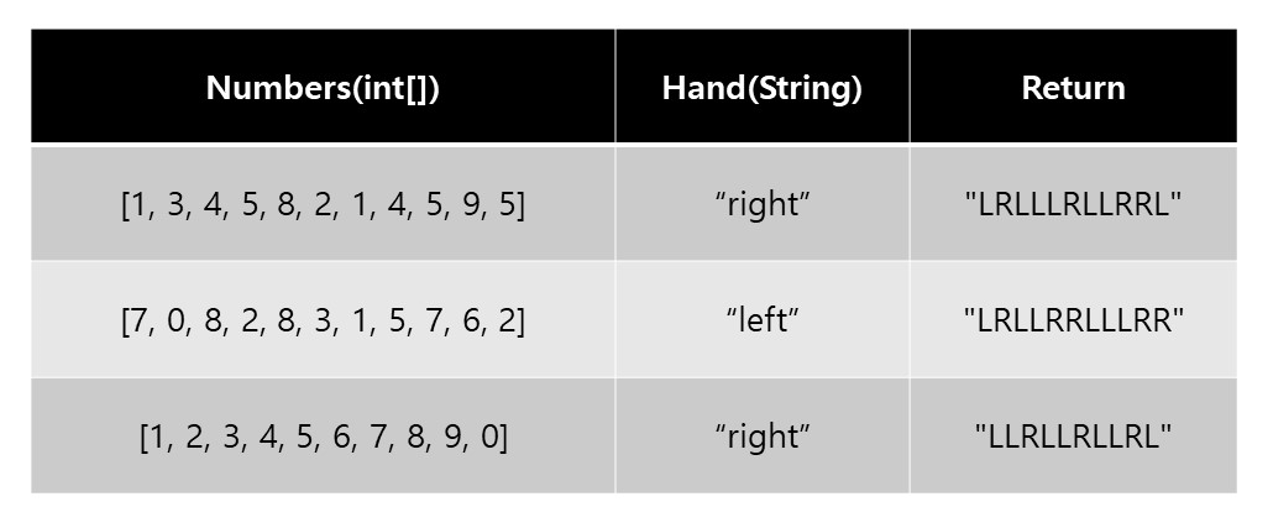

In [ ]:
import math

#손가락과 입력숫자의 거리를 구해주는 함수
def getDistance(num, finger):
    return abs(num[0]-finger[0]) + abs(num[1]-finger[1])
    
    
def solution(numbers, hand):
    answer = ''
    
    #오른손잡이인지 왼손잡이인지 간편하게 비교하기위해.
    hand = hand[0].upper()
    
    #손의 처음위치를 정수로 치환한다.
    left = 10
    right = 12
    
    #각 숫자의 좌표를 Dic형으로 입력하고, 예외 숫자를 초기화해준다.
    dic = {}
    dic[0] = [4, 2]
    dic[10] = [4, 1]
    dic[12] = [4, 3]
    
     # 2중 반복문이지만, 1~9까지기때문에 O(9)이라고 할 수 있다.
    for i in range(1, 4):
        for j in range(1, 4):
            dic[(i-1)*3+j] = [i, j]

            
    for num in numbers: # O(N)
        #기본 정해진 왼손과 오른손의 위치일 때
        if(num % 3 == 1):
            answer += 'L'
            left = num
        elif(num % 3 == 0 and num > 0):
            answer += 'R'
            right = num
            
        #2, 5, 8, 0과 같은 가운데 위치일 때
        else:
            #왼손과 오른손의 입력숫자와의 거리 비교 후 가까운 손으로 입력한다.
            left_distance = getDistance(dic[num], dic[left])
            right_distance = getDistance(dic[num], dic[right])
            
            if(left_distance < right_distance):
                answer += 'L'
                left = num
            elif(left_distance > right_distance):
                answer += 'R'
                right = num
            else:
                if(hand == 'L'):
                    answer += 'L'
                    left = num
                else:
                    answer += 'R'
                    right = num

    return answer